In [ ]:
## Python basics for novice data scientists, supported by Wagatsuma Lab@Kyutech 
#
# The MIT License (MIT): Copyright (c) 2020 Hiroaki Wagatsuma and Wagatsuma Lab@Kyutech
# 
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE. */
#
# # @Time    : 2025-4-19 
# # @Author  : Hiroaki Wagatsuma
# # @Site    : https://github.com/hirowgit/2A_python_basic_course
# # @IDE     : Python 3.9.16 (main, Dec  7 2022, 10:15:43) [Clang 14.0.0 (clang-1400.0.29.202)] on darwin
# # @File    : lec5_step02.py 

In [105]:
# module test: if you have an error when you run this code, 
# you need to check the installation status of those modules

import math 
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.cm as cm
import matplotlib as mp
import tkinter as tk

from scipy import interpolate

import sympy as sym
from IPython.display import Math

In [102]:
!pip install spb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0


In [103]:
# https://qiita.com/maskot1977/items/b4395da5f33f70cd4a09
from sympy.abc import *
from sympy import * 
# SymPy Plotting Backends (SPB): グラフを描く際に利用
from spb import *

# グラフを SVG で Notebook にインライン表示
%config InlineBackend.figure_formats = ['svg']

In [149]:
# v,t,phi,D = sym.Symbol('v'),sym.Symbol('t'),sym.Symbol('phi'),sym.Symbol('D')
sym.var('v,t,phi,D')
x_expr = lambda v,t: v*sym.cos(t)
y_expr = lambda v,t: v*sym.sin(t)
th_expr = lambda v,D,t: (v/D)*sym.tan(phi)
x,y,theta = Function('x'),Function('y'),Function('theta')
x2_expr=sym.Eq(sym.Derivative(x(t),t),x_expr(v,t))
y2_expr=sym.Eq(sym.Derivative(y(t),t),y_expr(v,t))
th2_expr=sym.Eq(sym.Derivative(theta(t),t),th_expr(v,D,t))
display(x2_expr)
display(y2_expr)
display(th2_expr)

Eq(Derivative(x(t), t), v*cos(t))

Eq(Derivative(y(t), t), v*sin(t))

Eq(Derivative(theta(t), t), v*tan(phi)/D)

In [161]:
sym.diff(x_expr(v,t),t,2)

-v*cos(t)

In [162]:
sym.diff(x_expr(v,t),t,1)

-v*sin(t)

In [163]:
sym.Eq(sym.diff(x,t,2),sym.diff(x_expr(v,t),t,1))

Eq(Derivative(x(t), (t, 2)), -v*sin(t))

In [166]:
maxL=600
maxL=60

# Runge Kutta Gill's parameters  
cq = [2.0, 1.0, 1.0, 2.0]
ch = [0.0, 0.5, 0.5, 1.0] # corrected
ckq = [0.5, 0.29289321881345248, 1.70710678118654752, 0.16666666666666666]
ck = [0.5, 0.29289321881345248, 1.70710678118654752, 0.5]
h = 0.1
# h=0.01

In [179]:
NofUnits=2
Phi=np.array([0, np.pi])
PhiR=np.array([Phi[1],Phi[0]])
qPhi=np.array([0,0])
prePhi = Phi

K=0.5
omega=np.array([1,1])
maxL=600
datD=np.zeros([maxL,NofUnits])
# oscillator setting
for i in range(maxL):
	# Runge Kutta method to calculate differential equations	
    for jr in range(4): 
        deltaPhi = omega + K * np.sin(PhiR - Phi)
        
        ak = h * deltaPhi
        r = (ak - cq[jr] * qPhi)  * ckq[jr]
        Phi = Phi + r 
        qPhi = qPhi + 3.0 * r - ck[jr] * ak 
        # display(deltaPhi,Phi)
    # Phi= Phi % 2*np.pi
    key=np.where(Phi>2*np.pi)[0]
    # if key:
    #     Phi[key] = Phi[key] - 2*np.pi
    PhiR=np.array([Phi[1],Phi[0]])
    datD[i,:]=Phi
    prePhi = Phi
    print(Phi)


[0.10253995091710305 3.244132604506896  ]
[0.2050799018342061 3.346672555423999 ]
[0.3076198527513092 3.449212506341102 ]
[0.4101598036684123 3.551752457258205 ]
[0.5126997545855154 3.654292408175308 ]
[0.6152397055026185 3.756832359092411 ]
[0.7177796564197216 3.859372310009514 ]
[0.8203196073368246 3.961912260926617 ]
[0.9228595582539276 4.0644522118437205]
[1.0253995091710306 4.166992162760824 ]
[1.1279394600881336 4.269532113677927 ]
[1.2304794110052366 4.372072064595031 ]
[1.3330193619223396 4.474612015512134 ]
[1.4355593128394426 4.577151966429238 ]
[1.5380992637565456 4.679691917346341 ]
[1.6406392146736486 4.782231868263445 ]
[1.7431791655907516 4.884771819180548 ]
[1.8457191165078544 4.9873117700976515]
[1.9482590674249571 5.089851721014755 ]
[2.05079901834206  5.192391671931858]
[2.153338969259163 5.294931622848962]
[2.255878920176266 5.397471573766065]
[2.358418871093369 5.500011524683169]
[2.460958822010472 5.602551475600272]
[2.563498772927575  5.7050914265173756]
[2.66603

In [ ]:
2*np.pi

In [95]:
key=np.where(Phi>2*np.pi)[0]
len(key)

0

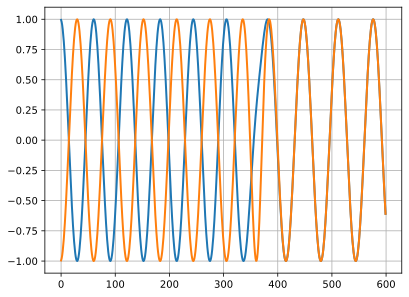

In [180]:
figNum=1
fig = plt.figure(figNum)
fig.clear()
plt.cla()
t=np.arange(maxL)

plt.plot(t,np.cos(datD),'-',linewidth=2)
# plt.plot(t[:600],np.cos(datD[:600]),'-',linewidth=2)

plt.grid()
plt.show()

In [55]:
NofUnits=2
Phi=np.array([0, np.pi])
PhiR=np.array([Phi[1],Phi[0]])
qPhi=np.array([0,0])
prePhi = Phi

K=0.5
omega=np.array([1,1])

datD=np.zeros([maxL,NofUnits])

In [56]:
jr=0
Phi

array([0.               , 3.141592653589793])

In [54]:
deltaPhi = omega + K * np.sin(PhiR - Phi)

ak = h * deltaPhi
r = (ak - cq[jr] * qPhi)  * ckq[jr]
Phi = Phi + r 
qPhi = qPhi + 3.0 * r - ck[jr] * ak 
Phi

array([0.05             , 3.191592653589793])

In [72]:
# sprintf('%1.1f',datD)
# '{1.1f}'.format(datD[0])

# np.set_printoptions(precision=3, floatmode='unique')
# print(datD)
np.round(datD, 2)

array([[0.1 , 3.24],
       [0.21, 3.35],
       [0.31, 3.45],
       [0.41, 3.55],
       [0.51, 3.65],
       [0.62, 3.76],
       [0.72, 3.86],
       [0.82, 3.96],
       [0.92, 4.06],
       [1.03, 4.17],
       [1.13, 4.27],
       [1.23, 4.37],
       [1.33, 4.47],
       [1.44, 4.58],
       [1.54, 4.68],
       [1.64, 4.78],
       [1.74, 4.88],
       [1.85, 4.99],
       [1.95, 5.09],
       [2.05, 5.19],
       [2.15, 5.29],
       [2.26, 5.4 ],
       [2.36, 5.5 ],
       [2.46, 5.6 ],
       [2.56, 5.71],
       [2.67, 5.81],
       [2.77, 5.91],
       [2.87, 6.01],
       [2.97, 6.12],
       [3.08, 6.22],
       [3.18, 6.32],
       [3.28, 6.42],
       [3.38, 6.53],
       [3.49, 6.63],
       [3.59, 6.73],
       [3.69, 6.83],
       [3.79, 6.94],
       [3.9 , 7.04],
       [4.  , 7.14],
       [4.1 , 7.24],
       [4.2 , 7.35],
       [4.31, 7.45],
       [4.41, 7.55],
       [4.51, 7.65],
       [4.61, 7.76],
       [4.72, 7.86],
       [4.82, 7.96],
       [4.92,

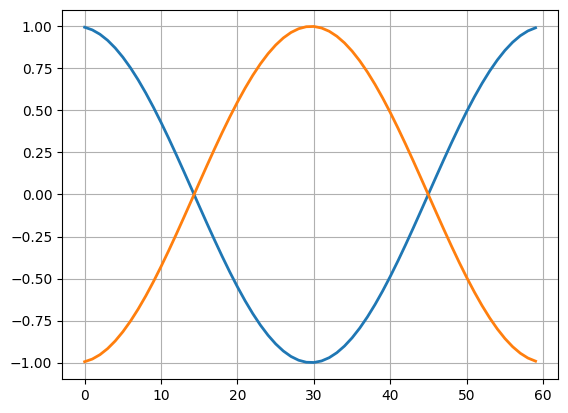

In [76]:
figNum=1
fig = plt.figure(figNum)
fig.clear()
plt.cla()
t=np.arange(maxL)

plt.plot(t,np.cos(datD),'-',linewidth=2)

plt.grid()
plt.show()

In [28]:
NofUnits=2
datD=np.zeros([maxL,NofUnits])
datD

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [7]:
Phi=np.array([0, np.pi])
PhiR=np.array([Phi[1],Phi[0]])
qPhi=np.array([0,0])
prePhi = Phi

K=0.5
omega=np.array([1,1])

In [12]:
deltaPhi = omega + K * np.sin(PhiR - Phi)

In [9]:
np.sin(PhiR - Phi)

array([ 1.2246468e-16, -1.2246468e-16])

In [13]:
ak = h * deltaPhi

In [17]:
jr=0

In [18]:
ak = h * deltaPhi
r = (ak - cq[jr] * qPhi)  * ckq[jr]
Phi = Phi + r 
qPhi = qPhi + 3.0 * r - ck[jr] * ak 

In [19]:
Phi

array([0.05      , 3.19159265])